In [3]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import folium
import mapclassify
from matplotlib import pyplot as plt
from shapely.geometry import box


In [4]:
# Define your bounding box coordinates (in EPSG:4326, lat/lon)
xmin = -5.3572  # Min longitude
xmax = -5.2463  # Max longitude
ymin = 51.8436  # Min latitude
ymax = 51.9173  # Max latitude

# Load your CSV data
df = pd.read_csv('nrw_ph2_low_heath_veg.csv')

# Convert the 'geom' column to Shapely geometries
df['geometry'] = df['geom'].apply(wkt.loads)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Set the CRS to EPSG:27700 (UK National Grid), reproject to EPSG:4326 (lat/lon)
gdf.set_crs('EPSG:27700', allow_override=True, inplace=True)
gdf = gdf.to_crs('EPSG:4326')

# Create the bounding box using the defined coordinates (in EPSG:4326)
bounding_box = box(xmin, ymin, xmax, ymax)

# Convert the bounding box into a GeoDataFrame
bbox_gdf = gpd.GeoDataFrame(geometry=[bounding_box], crs='EPSG:4326')

# Filter the GeoDataFrame using the bounding box to keep only vegetation polygons within the bounds
gdf_filtered = gdf[gdf.intersects(bbox_gdf.geometry[0])]

# Filter the GeoDataFrame to remove geom from displayed data
gdf_filtered = gdf_filtered.drop(columns=['geom'])

# Check the filtered data (make sure it's correct)
print(gdf_filtered.head())
print(gdf_filtered.columns)

                             FID vegetation_type  area_ha    poly_id  \
4349  nrw_ph2_low_heath_veg.4350            MC9a     0.41  SM72/H5/1   
4350  nrw_ph2_low_heath_veg.4351            MC9a     0.34  SM72/H5/2   
4351  nrw_ph2_low_heath_veg.4352            MC9a     0.22  SM72/H5/3   
4352  nrw_ph2_low_heath_veg.4353            MC9b     0.32  SM72/H5/4   
4353  nrw_ph2_low_heath_veg.4354           MC10a     0.42  SM72/H5/5   

     site_code        site_name original_vegetation_type  label    id  \
4349   SM72/H5  St David's Head                     MC9a   MC9a  4350   
4350   SM72/H5  St David's Head                     MC9a   MC9a  4351   
4351   SM72/H5  St David's Head                     MC9a   MC9a  4352   
4352   SM72/H5  St David's Head                     MC9b   MC9b  4353   
4353   SM72/H5  St David's Head                    MC10a  MC10a  4354   

                                               geometry  
4349  MULTIPOLYGON (((-5.28852 51.91352, -5.28853 51...  
4350  MULTIP

In [5]:
# Now, use `explore()` to display only the filtered polygons on the map
gdf_filtered.explore(
    column='vegetation_type',  # Show vegetation type as the color coding
    cmap='viridis',  # Choose a color map for the data
    tiles='CartoDB positron',  # Set the basemap
    legend=True,  # Show the legend for the data
    attr="Map tiles by CartoDB, under ODbL. Data by OpenStreetMap."  # Add the attribution
)


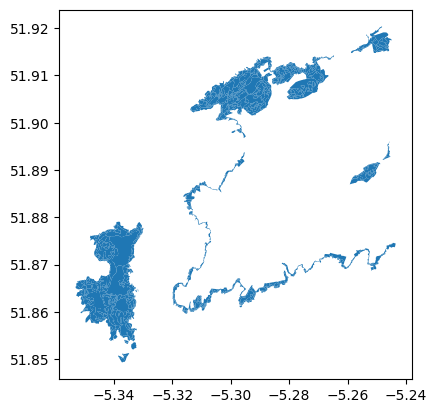

In [6]:
gdf_filtered.plot()
plt.show()